In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns

# datafile = './data/'
data_train = pd.read_csv('cs-training.csv')

"""
数据说明
SeriousDlqin2yrs：违约客户及超过90天逾期客户，bool型；
RevolvingUtilizationOfUnsecuredLines：贷款以及信用卡可用额度与总额度比例，百分比；
age：用户年龄，整型
NumberOfTime30-59DaysPastDueNotWorse：35-59天逾期但不糟糕次数，整型；
DebtRatio：负债率，百分比；
MonthlyIncome：月收入，整型；
NumberOfOpenCreditLinesAndLoans：开放式信贷和贷款数量，开放式贷款（分期付款如汽车贷款或抵押贷款）和信贷（如信用卡）的数量，整型；
NumberOfTimes90DaysLate：90天逾期次数：借款者有90天或更高逾期的次数，整型；
NumberRealEstateLoansOrLines：不动产贷款或额度数量：抵押贷款和不动产放款包括房屋净值信贷额度，整型；
NumberOfTime60-89DaysPastDueNotWorse：60-89天逾期但不糟糕次数：借款人在在过去两年内有60-89天逾期还款但不糟糕的次数，整型；
NumberOfDependents：家属数量：不包括本人在内的家属数量，整型；
"""
#变量重命名
columns = ({'SeriousDlqin2yrs':'target',
            'RevolvingUtilizationOfUnsecuredLines':'percentage',
           'NumberOfOpenCreditLinesAndLoans':'open_loan',
           'NumberOfTimes90DaysLate':'90-',
           'NumberRealEstateLoansOrLines':'estate_loan',
           'NumberOfTime60-89DaysPastDueNotWorse':'60-89',
           'NumberOfDependents':'Dependents',
           'NumberOfTime30-59DaysPastDueNotWorse':'30-59'}
          )
data_train.rename(columns=columns,inplace = True)

#查看数据缺失情况并填充缺失值
missing_df = data_train.isnull().sum(axis =0).reset_index()
missing_df
#我们看到'MonthlyIncome'和'NumberOfDependents'有缺失值
data_train.MonthlyIncome.isnull().sum()/data_train.shape[0]
data_train.Dependents.isnull().sum()/data_train.shape[0]

"""
对于缺失值处理，有很多种方法：
缺失值极多：若缺失值样本占总数比例极高，直接舍弃，因为作为特征加入反而会引入噪声值（可以使用删除近零常量的方法删除）。
非连续特征缺失值适中：如果缺值的样本适中，而该属性非连续值特征属性，就把NaN作为一个新类别，加入到类别特征中。
连续特征缺失值适中：如果缺值的样本适中，考虑给定一个step，然后离散化，将NaN作为一个type加入到属性类目中。
缺失值较少：考虑利用填充的办法进行处理。其中有均值、众数、中位数填充。
用sklearn里的RandomForest/KNN模型去拟合数据样本训练模型，然后去填充缺失值。
拉格朗日插值法。
"""

#由于MonthlyIncome缺失值达到29731条数据，比例较大，因此不能直接将缺失值删除，选择随机森林法，将有缺失值的变量分成已知特征和未知特征
#（仅含有缺失值），将已知 特征和标签进行训练，得到训练模型，对未知特征进行预测。
print(data_train['MonthlyIncome'].max())
print(data_train['MonthlyIncome'].min())
print(data_train['MonthlyIncome'].mean())
print(data_train['MonthlyIncome'].mode())
print(data_train['MonthlyIncome'].median())
print(data_train['MonthlyIncome'].skew())

3008750.0
0.0
6670.221237392844
0    5000.0
dtype: float64
5400.0
114.0403179452332


In [63]:
def splitA(txt, delimiter):
    len_de = len(delimiter)
    len_tx = len(txt)
    for i in range(len_tx):
        if (i + len_de) <= len_tx:
            ss = txt[i:i + len_de]
            if delimiter == ss:
                if i == 0:
                    a = [txt[i+len_de-1:]]
                elif i+len_de == len_tx:
                    a = [txt[:i]]
                else:
                    a = [txt[:i], txt[i+len_de:]]
                b.append(a)
    return b

In [64]:
def splitB(txt, delimiter):
    mylist = txt
    del_l = delimiter
    return del_l.join(mylist)

In [65]:
import numpy as np

In [66]:
splitA('abcddwasdbcas', 'bc')

[]

In [48]:
type(len('abc'))

int

In [4]:
aa[0:2]

'ab'

In [2]:
data_train = data_train.drop(columns=['Unnamed: 0'])

In [3]:
data_train = data_train[data_train.Dependents.notna()]

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149999
Data columns (total 11 columns):
target           146076 non-null int64
percentage       146076 non-null float64
age              146076 non-null int64
30-59            146076 non-null int64
DebtRatio        146076 non-null float64
MonthlyIncome    120269 non-null float64
open_loan        146076 non-null int64
90-              146076 non-null int64
estate_loan      146076 non-null int64
60-89            146076 non-null int64
Dependents       146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.4 MB


C:\Users\feigeZzzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\feigeZzzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


3008750.0
0.0
6110.063508036912
0    2554.0
dtype: float64
5000.0
122.74442283136938
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145563 entries, 0 to 149999
Data columns (total 11 columns):
target           145563 non-null int64
percentage       145563 non-null float64
age              145563 non-null int64
30-59            145563 non-null int64
DebtRatio        145563 non-null float64
MonthlyIncome    145563 non-null float64
open_loan        145563 non-null int64
90-              145563 non-null int64
estate_loan      145563 non-null int64
60-89            145563 non-null int64
Dependents       145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.3 MB


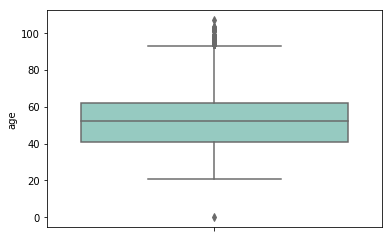

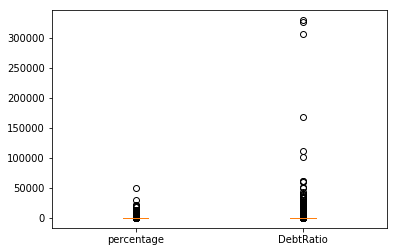

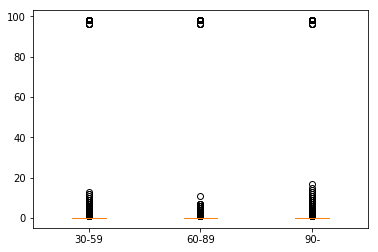

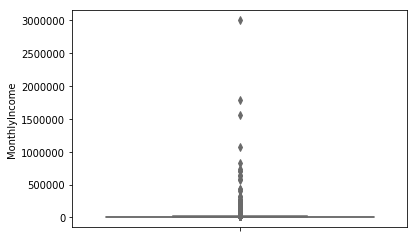

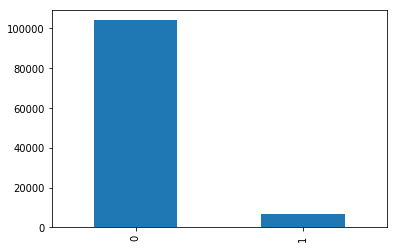

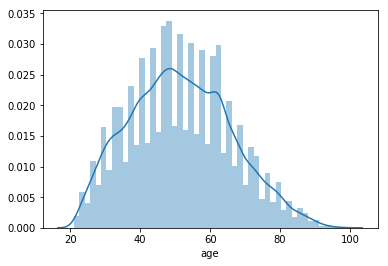

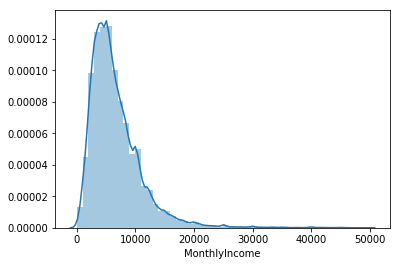

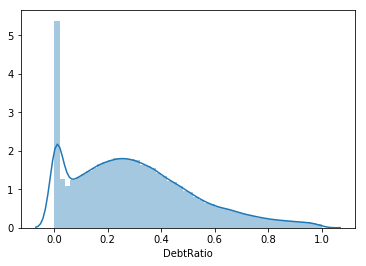

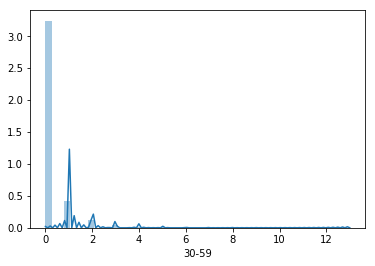

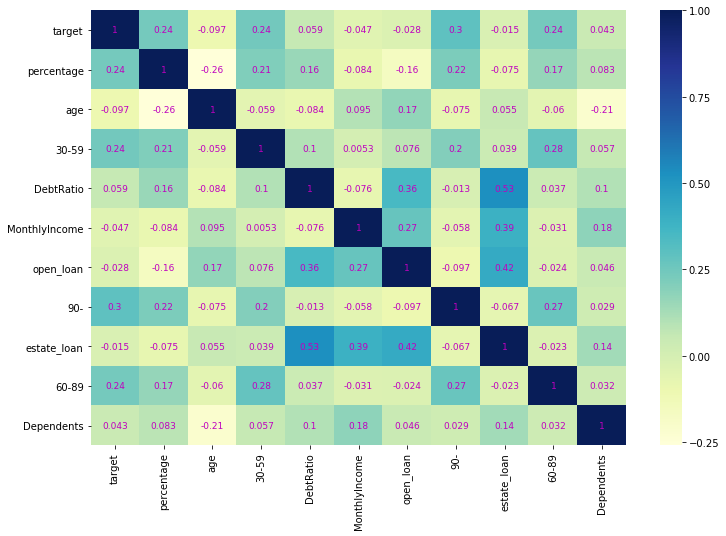

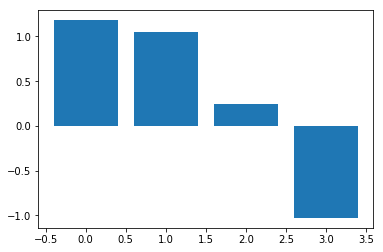

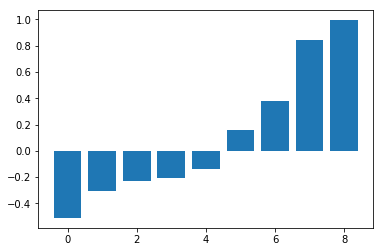

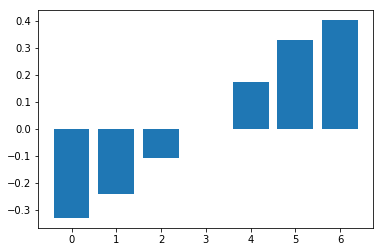

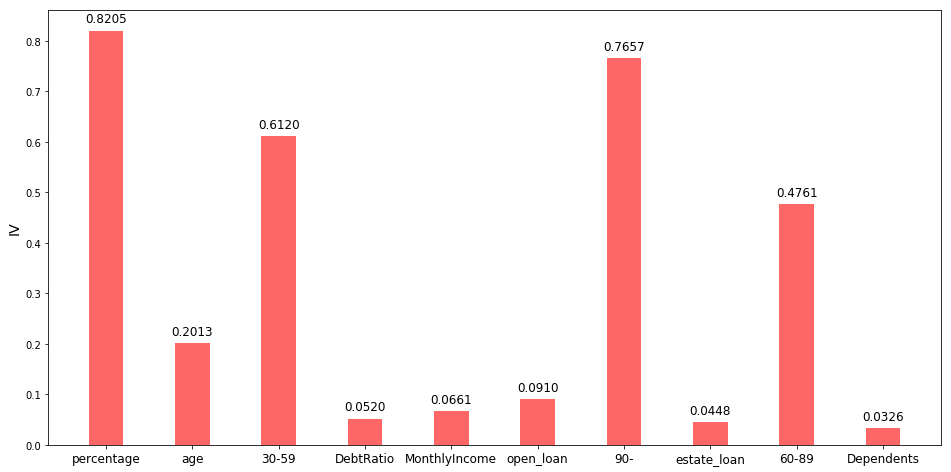

In [5]:
# 用随机森林对缺失值进行预测
from sklearn.ensemble import RandomForestRegressor
  
# 预测填充函数
def rf_filling(df):
    # 处理数集
    process_miss = df.iloc[:,[5,0,1,2,3,4,6,7,8,9]]
    #分成已知特征与未知特征
    known = process_miss[process_miss.MonthlyIncome.notnull()].as_matrix()
    unknown = process_miss[process_miss.MonthlyIncome.isnull()].as_matrix()
    #X，要训练的特征
    X = known[:,1:]
    #y ,结果标签
    y = known[:,0]
    #训练模型
    rf = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=3,n_jobs=-1)
    rf.fit(X,y)
    #预测缺失值
    pred = rf.predict( unknown[:,1:]).round(0)
    #补缺缺失值
    df.loc[df['MonthlyIncome'].isnull(),'MonthlyIncome'] = pred
    return df
data_train = rf_filling(data_train)

print(data_train['MonthlyIncome'].max())
print(data_train['MonthlyIncome'].min())
print(data_train['MonthlyIncome'].mean())
print(data_train['MonthlyIncome'].mode())
print(data_train['MonthlyIncome'].median())
print(data_train['MonthlyIncome'].skew())

#Dependents变量缺失值比较少，直接删除，对总体模型不会造成太大影响。对缺失值处理完之后，删除重复项
data_train = data_train.dropna()
data_train = data_train.drop_duplicates()
data_train.info()

"""
异常值处理
缺失值处理完毕后，我们还需要进行异常值处理。异常值是指明显偏离大多数抽样数据的数值，比如个人客户的年龄大于100或小于0时，通常认为该值为异常值。找出样本总体中的异常值，通常采用离群值检测的方法。 离群值检测的方法有单变量离群值检测、局部离群值因子检测、基于聚类方法的离群值检测等方法。
在本数据集中，采用单变量离群值检测来判断异常值，采用箱线图。
"""
#age
sns.boxplot(data_train.age,palette = 'Set3',orient = 'v')
plt.show()
#将age小于0和大于100的值作为离群值删去
data_train = data_train[(data_train.age>0)&(data_train.age<100)]

#RevolvingUtilizationOfUnsecuredLines 和 DebtRatio
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([data_train.percentage,data_train.DebtRatio])
ax.set_xticklabels(['percentage','DebtRatio'])
plt.show()
#对于百分比大于1的为异常值，我们尝试分别用两种方法处理：1、直接删除；2、将离群值当空值处理，填充均值
data_train = data_train[(data_train.percentage<1)]
data_train = data_train[(data_train.DebtRatio<1)]

#变量0-59天，60-89天，90-三个异常值处理
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([data_train['30-59'],data_train['60-89'],data_train['90-']])
ax.set_xticklabels(['30-59','60-89','90-'])
plt.show()
#三个变量都有离群值，查看各个特征离群值数量
data_train[data_train['30-59']>60].shape
data_train[data_train['60-89']>90].shape
data_train[data_train['90-']>90].shape
#离群值数量较少，全部删除
data_train= data_train[data_train['30-59']<60]
data_train = data_train[data_train['60-89']<90]
data_train = data_train[data_train['90-']<90]
data_train = data_train.reset_index(drop=True)#重设索引

#MonthlyIncome
sns.boxplot(data_train.MonthlyIncome,palette = 'Set3',orient = 'v')
plt.show()
data_train[data_train['MonthlyIncome']>50000].shape
data_train = data_train[data_train['MonthlyIncome']<50000]
data_train = data_train.reset_index(drop=True)#重设索引

#EDA.首先分析好坏客户占比情况
data_train.target.value_counts().plot(kind = 'bar')
plt.show()
t = (data_train.target.value_counts()[1])/len(data_train)#坏样本较少，可以考虑采用Smote转换

sns.distplot(data_train.age)#基本符合正态分布
plt.show()

sns.distplot(data_train['MonthlyIncome'])
plt.show()

sns.distplot(data_train['DebtRatio'])
plt.show()

sns.distplot(data_train['30-59'])
plt.show()
#可以考虑使用Box_Cox 转换调整数据的偏度

#多变量分析
corr = data_train.corr()
corr
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='YlGnBu', ax=ax1, annot_kws={'size': 9, 'color': 'm'})#绘制相关性系数热力图
plt.show()
#由上图可以看出，各变量之间的相关性是非常小的，可以初步判断不存在多重共线性问题

#特征选择,woe分箱
from scipy import stats
def monoto_bin(Y, X, n = 20):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe
  
dfx1,ivx1,cutx1,woex1 = monoto_bin(data_train['target'],data_train['percentage'],n=10)
dfx2,ivx2,cutx2,woex2 = monoto_bin(data_train['target'],data_train['age'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(data_train['target'],data_train['DebtRatio'],n=10)
dfx5,ivx5,cutx5,woex5 = monoto_bin(data_train['target'],data_train['MonthlyIncome'],n=10)

plt.bar(range(len(woex1)),woex1)
plt.show()

plt.bar(range(len(woex2)),woex2)#完全单调，分箱效果不错
plt.show()

plt.bar(range(len(woex5)),woex5)
plt.show()

dfx1
monoto_bin(data_train['target'],data_train['percentage'],n=10)

def self_bin(Y, X, bin):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index = True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #iv，信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
#     print (d4)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe
  
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx3 = [ninf, 0, 1, 3, 5, pinf]
cutx4 = [ninf,0,0.1,0.35,pinf]
cutx6 = [ninf, 1, 2, 3, 5, pinf]
cutx7 = [ninf, 0, 1, 3, 5, pinf]
cutx8 = [ninf, 0,1,2, 3, pinf]
cutx9 = [ninf, 0, 1, 3, pinf]
cutx10 = [ninf, 0, 1, 2, 3, 5, pinf]
len(cutx5)

dfx3, ivx3,woex3 = self_bin(data_train['target'],data_train['30-59'],cutx3)
dfx4, ivx4,woex4 = self_bin(data_train['target'],data_train['DebtRatio'],cutx4)
dfx6, ivx6,woex6 = self_bin(data_train['target'],data_train['open_loan'],cutx6) 
dfx7, ivx7,woex7 = self_bin(data_train['target'],data_train['90-'],cutx7)
dfx8, ivx8,woex8 = self_bin(data_train['target'],data_train['estate_loan'],cutx8) 
dfx9, ivx9,woex9 = self_bin(data_train['target'],data_train['60-89'],cutx9)
dfx10, ivx10,woex10 = self_bin(data_train['target'],data_train['Dependents'],cutx10)

y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]
index=data_train.columns.drop('target')
fig= plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,11), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,11))
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
#在柱状图上添加数字标签
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()
"""
根据IV值判断变量预测能力的标准:
< 0.02： useless for predition
0.02-0.1： weak predictor
0.1-0.3： medium predictor
0.3-0.5： strong predictor
大于0.5： suspicious or too good to be true
"""
#删除掉iv小于0.01的变量，DebtRatio,MonthlyIncome,open_loan,estate_loan,Dependents

def change_woe(d,cut,woe):
    list=[]
    i=0
    while i<len(d):
        value=d[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list
#训练集转化
data_train['percentage'] = pd.Series(change_woe(data_train['percentage'], cutx1, woex1))
data_train['age'] = pd.Series(change_woe(data_train['age'], cutx2, woex2))
data_train['30-59'] = pd.Series(change_woe(data_train['30-59'], cutx3, woex3))
data_train['DebtRatio'] = pd.Series(change_woe(data_train['DebtRatio'], cutx4, woex4))
data_train['MonthlyIncome'] = pd.Series(change_woe(data_train['MonthlyIncome'], cutx5, woex5))
data_train['open_loan'] = pd.Series(change_woe(data_train['open_loan'], cutx6, woex6))
data_train['90-'] = pd.Series(change_woe(data_train['90-'], cutx7, woex7))
data_train['estate_loan'] = pd.Series(change_woe(data_train['estate_loan'], cutx8, woex8))
data_train['60-89'] = pd.Series(change_woe(data_train['60-89'], cutx9, woex9))
data_train['Dependents'] = pd.Series(change_woe(data_train['Dependents'], cutx10, woex10))

#删除对target不明显的变量
train_X =data_train.drop(['DebtRatio','MonthlyIncome','open_loan','estate_loan','Dependents'],axis=1)
# test_X =data_test.drop(['DebtRatio','MonthlyIncome','open_loan','estate_loan','Dependents'],axis=1)

#模型建立
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = train_X.drop('target',axis = 1)
y = train_X['target']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 0)
train = pd.concat([train_y,train_x], axis =1)
test = pd.concat([test_y,test_x], axis =1)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

C:\Users\feigeZzzz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


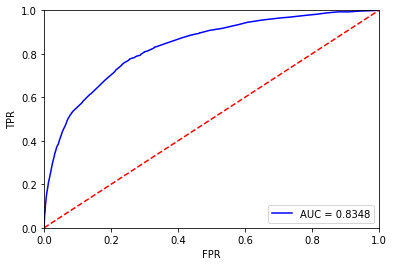

In [30]:
lr = LogisticRegression(penalty= 'l1')
lr.fit(train_x,train_y)

#绘制roc曲线
from sklearn.metrics import roc_curve, auc
# y_pred= lr.predict(train_x)  
train_predprob = lr.predict_proba(train_x)[:,1]  
test_predprob = lr.predict_proba(test_x)[:,1] 
FPR,TPR,threshold =roc_curve(test_y,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.4f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

C:\Users\feigeZzzz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


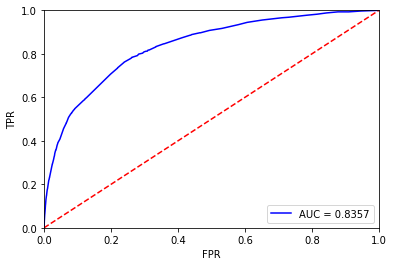

In [44]:
# 对样本进行重采样
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, ratio=0.8)
train_X_1, train_y_1 = ros.fit_resample(train_x, train_y)
lr = LogisticRegression(penalty= 'l1')
lr.fit(train_X_1,train_y_1)

#绘制roc曲线
from sklearn.metrics import roc_curve, auc
# y_pred= lr.predict(train_x)  
train_predprob = lr.predict_proba(train_X_1)[:,1]  
test_predprob = lr.predict_proba(test_x)[:,1] 
FPR,TPR,threshold =roc_curve(test_y,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.4f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=7, )

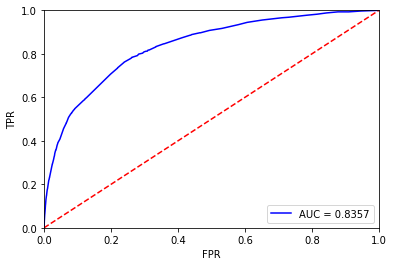

In [61]:
rfc.fit(train_X_1,train_y_1)

#绘制roc曲线
from sklearn.metrics import roc_curve, auc
# y_pred= lr.predict(train_x)   
test_predprob = lr.predict_proba(test_x)[:,1] 
FPR,TPR,threshold =roc_curve(test_y,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.4f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [60]:
import lightgbm as lgb

In [63]:
gbm = lgb.LGBMClassifier(num_leaves=30, max_depth=6, n_estimators=200)

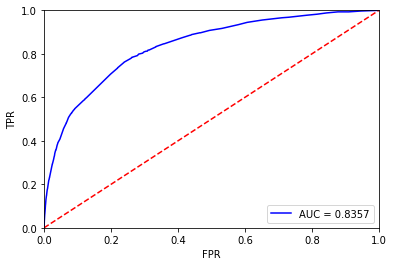

In [67]:
rfc.fit(train_X_1, train_y_1)

#绘制roc曲线
from sklearn.metrics import roc_curve, auc
# y_pred= lr.predict(train_x)   
test_predprob = lr.predict_proba(test_x)[:,1] 
FPR,TPR,threshold =roc_curve(test_y,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.4f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
# 个人总分=基础分+各部分得分
import math
B = 20 / math.log(2)
A = 600 - B / math.log(20)
# 基础分
base = round(A+B *lr.intercept_[0], 0)
base

#计算分数函数
def compute_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

x1_percentage = compute_score(lr.coef_[0][0], woex1, B)
x2_age = compute_score(lr.coef_[0][1], woex2, B)
x4_59 = compute_score(lr.coef_[0][2], woex4, B)
x7_90 = compute_score(lr.coef_[0][3], woex7, B)
x9_60 = compute_score(lr.coef_[0][4], woex9, B)

def change_score(series,cut,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

#导入test数据
test1 = pd.read_csv(datafile + 'cs-test.csv')
test2 = pd.DataFrame()
test2['x1_percentage'] = pd.Series(change_score(test1['percentage'], cutx1, x1_percentage))
test2['x2_age'] = pd.Series(change_score(test1['age'], cutx2, x2_age))
test2['x4_59'] = pd.Series(change_score(test1['DebtRatio'], cutx4,x4_59))
test2['x7_90'] = pd.Series(change_score(test1['90-'], cutx7, x7_90))
test2['x9_60'] = pd.Series(change_score(test1['60-89'], cutx9, x9_60))

test2['Score'] = test2['x1_percentage'] + test2['x2_age'] + test2['x4_59']+test2['x7_90']+test2['x9_60']+ base
sns.distplot(test2['Score'],bins = 30,color = 'r')#分数分布
plt.figure(figsize=(14,7))
plt.show()